In [3]:
#Tightbinding Library
from TB import *

In [4]:
file_path = f"./"

In [5]:
#Create tightbinding model
## nbnd is number of bands in wannier calculation
## points is number of points in hr.dat file
## fermi_energy is taken from nscf calculation
model = TB(file_path,nscf="nscf.out", wout="1T-NbSe2.wout",hr="1T-NbSe2_hr.dat")

Length of the path is  499


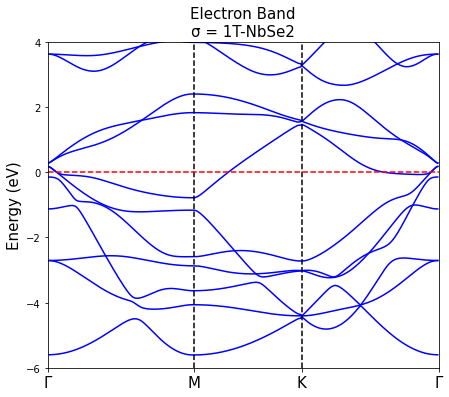

In [8]:
# ##Electron band energies in 1d path
path, sym, label= GMKG(500)
band = array(model.parallel_solver(path))
model.plot_electron_path(band,sym,label,ylim=[-6,4],temp="1T-NbSe2")

In [56]:
# ##Electron band energies in 2d mesh
mesh = model.mesh_2d(200)*2
band_2d = array(model.parallel_solver(mesh))

In [75]:
band_2d

array([[-5.60081227, -5.59389278, -5.57318366, ..., -5.57318366,
        -5.59389278, -5.60081227],
       [-2.71086319, -2.72931444, -2.78200524, ..., -2.78200524,
        -2.72931444, -2.71086319],
       [-2.7106616 , -2.70812174, -2.70059909, ..., -2.70059909,
        -2.70812174, -2.7106616 ],
       ...,
       [ 0.28064236,  0.38363421,  0.52283605, ...,  0.52283605,
         0.38363421,  0.28064236],
       [ 3.61802735,  3.59315907,  3.52402079, ...,  3.52402079,
         3.59315907,  3.61802735],
       [ 3.61891099,  3.61567126,  3.60811265, ...,  3.60811265,
         3.61567126,  3.61891099]])

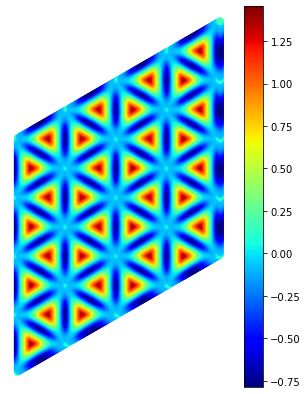

In [57]:
model.plot_electron_mesh(mesh=mesh, band=band_2d[6])

In [58]:
t_mesh = model.t_mesh(mesh)

In [59]:
df = pd.DataFrame()
df['x']=t_mesh[0]
df['y']=t_mesh[1]
df['z']=band_2d[6]

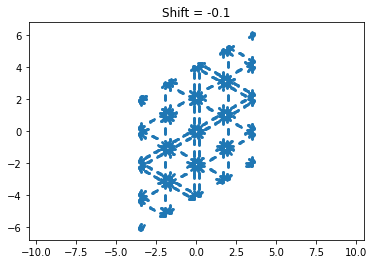

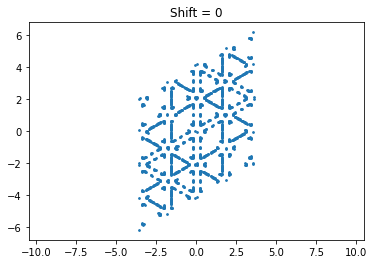

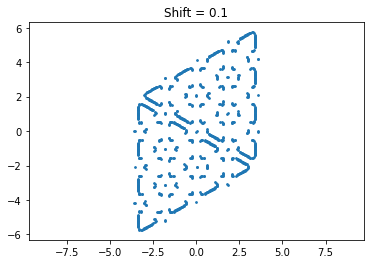

In [79]:
shift = [-0.1,0,0.1]
fs_thickness=0.02
for i in shift:
    upper = i+fs_thickness
    lower = i-fs_thickness
    fs=df.query(f"{lower} <= z <= {upper}")
    plt.scatter(fs.x,fs.y,s=3)
    plt.axis("equal")
    plt.title(f"Shift = {i}")
    plt.show()

(-3.9635727999999997,
 3.9635727999999997,
 -6.796114909547739,
 6.796114909547739)

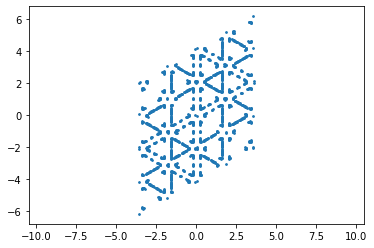

In [78]:
plt.scatter(fs.x,fs.y,s=3)
plt.axis("equal")